### Assignment 01
Linear regression by using Deep Neural network: Implement Boston housing price prediction problem by Linear regression using Deep Neural network. Use Boston House price prediction dataset.

In [1]:
!pip install numpy
!pip install matplotlib
!pip install pandas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/BE_SEM_II_Lab/BostonHousing.csv')

df.head()


,Crime_rate,zn,indus,chas,nox,rm,Age,Distance,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
df.isnull().sum()

,0
Crime_rate,0
zn,0
indus,0
chas,0
nox,0
rm,5
Age,0
Distance,0
rad,0
tax,0


In [8]:
df['rm'].fillna(df['rm'].mean(), inplace=True)

df.isnull().sum()

<ipython-input-8-37c115c01564>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rm'].fillna(df['rm'].mean(), inplace=True)


,0
Crime_rate,0
zn,0
indus,0
chas,0
nox,0
rm,0
Age,0
Distance,0
rad,0
tax,0


In [9]:
x = df.drop('medv', axis=1)
y=df['medv']


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mae', optimizer='adam', metrics=['mse', 'mae'])


In [13]:
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 21.9066 - mae: 21.9066 - mse: 565.6504
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 21.8934 - mae: 21.8934 - mse: 571.0721
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 20.9129 - mae: 20.9129 - mse: 529.0185
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.4408 - mae: 20.4408 - mse: 510.6075  
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.4943 - mae: 18.4943 - mse: 433.2928 
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.8671 - mae: 17.8671 - mse: 419.5294 
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16.7347 - mae: 16.7347 - mse: 376.1666 
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.3372 - mae: 14.3372 - mse: 296.5295 
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.4532 - mae: 13.4532 - mse: 269.1336 
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.8176 - mae: 11.8176 - mse: 221.2636 
Epoch 11/50
12/12 

In [14]:
metrics = model.evaluate(x_test, y_test)
metrics


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.0461 - mae: 5.0461 - mse: 52.3913 


[4.734522342681885, 48.62095260620117, 4.734522342681885]

In [15]:
y_pred = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [16]:
y_test = np.array(y_test).reshape(-1, 1)

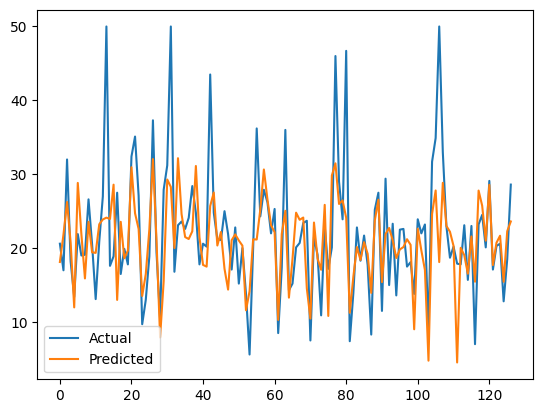

In [17]:
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()